Task 1

In [1]:
import tweepy
import pandas as pd


In [2]:
user1ID = 'ScottMorrisonMP'
user2ID = "PeterDutton_MP"

auth = tweepy.OAuthHandler('5rNNVu8ngWdWaKGHnWUZe95iC', 'umncxfufMvk3TP7gwGAlsv6PCbjDnCAhdJ5TkPw28zgbE8tD9E')
auth.set_access_token('780315659934785536-GgafO4eESW0klRGTUpk6CjOWlI5IJ4Q', 'cMSul3hefEviIQY8ZT7KoMN2M7wUl0KWB90ptpOhmJdfm')
api = tweepy.API(auth)



In [3]:
try:
    user = api.verify_credentials()
    print('Authentication OK.')
except:
    print('Error during authentication.')

Authentication OK.


In [4]:
tweets = api.user_timeline(screen_name=user1ID, count=200,include_rts = False, tweet_mode = 'extended')
tweets2 = api.user_timeline(screen_name=user2ID, count=200,include_rts = False,tweet_mode = 'extended')

In [5]:
user1Tweets = []
user2Tweets = []


In [6]:
for tweet in tweets:
    user1Tweets.append([tweet.user.name, tweet.full_text, pd.to_datetime(tweet.created_at).time().replace(microsecond=0, second=0, minute=0)])
for tweet in tweets2:
    user2Tweets.append([tweet.user.name, tweet.full_text, pd.to_datetime(tweet.created_at).time().replace(microsecond=0, second=0, minute=0)])


In [7]:
user1Tweets = pd.DataFrame(user1Tweets)
user2Tweets = pd.DataFrame(user2Tweets)

In [8]:
all_tweets = user1Tweets.append(user2Tweets)

In [9]:
data = pd.DataFrame({'name':all_tweets[0], 'text': all_tweets[1], 'created_at': all_tweets[2]})

Task 2

In [11]:
grouped_by_time = data.groupby('created_at')['name'].value_counts()

<AxesSubplot:xlabel='name'>

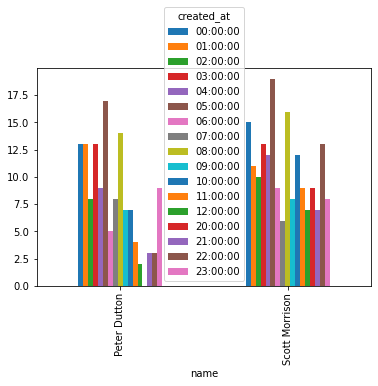

In [12]:
grouped_by_time.unstack(0).plot.bar()

Task 3

<Figure size 1440x1440 with 0 Axes>

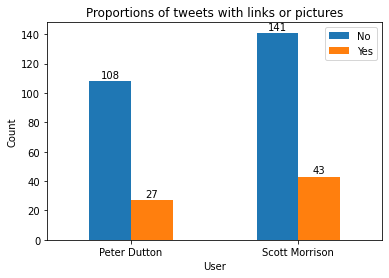

In [28]:
import matplotlib.pyplot as plt

user1Tweets = []
user2Tweets = []
for tweet in tweets:
    user1Tweets.append([tweet.user.name, tweet.full_text, pd.to_datetime(tweet.created_at).time().replace(microsecond=0, second=0, minute=0), 'Yes' if len(tweet.entities['urls']) > 0 else 'No'])
for tweet in tweets2:
    user2Tweets.append([tweet.user.name, tweet.full_text, pd.to_datetime(tweet.created_at).time().replace(microsecond=0, second=0, minute=0), 'Yes' if len(tweet.entities['urls']) > 0 else 'No'])
user1Tweets = pd.DataFrame(user1Tweets)
user2Tweets = pd.DataFrame(user2Tweets)
all_tweets = user1Tweets.append(user2Tweets)
data = pd.DataFrame({'name':all_tweets[0], 'text': all_tweets[1], 'created_at': all_tweets[2], 'has_link_or_picture':all_tweets[3]})
grouped_by_picOrLink = data.groupby('has_link_or_picture')['name'].value_counts()
plt.figure(figsize=(20, 20))
ax = grouped_by_picOrLink.unstack(0).plot(kind='bar', rot=0)
ax.set_title("Proportions of tweets with links or pictures", y = 1)
ax.set_xlabel('User')
ax.set_ylabel('Count')
plt.legend(loc="upper right")
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')

plt.show()

Task 4

In [68]:
import numpy as np
def getHashtags(text):
    tags = []
    for word in text.split():
        if word[0] == '#':
            tags.append(word[1:])
    return ', '.join(tags) if len(tags) > 0 else np.nan

In [69]:
data['hashtags'] = data.apply(lambda x:getHashtags(x['text']), axis=1)

In [70]:
data.groupby('hashtags')['name'].value_counts()

hashtags                               name          
ASEAN                                  Peter Dutton      1
AUKMIN                                 Peter Dutton      1
AUKUS                                  Scott Morrison    4
                                       Peter Dutton      1
AUKUS, AUKUS                           Scott Morrison    1
AUKUS, UnbreakableAlliance             Peter Dutton      1
AnzacDay                               Scott Morrison    1
AusOfTheYear.                          Scott Morrison    1
AustraliaDay, RepublicDayIndia, dosti  Scott Morrison    1
Budget22                               Scott Morrison    5
                                       Peter Dutton      1
COP26                                  Scott Morrison    1
COP26.                                 Scott Morrison    1
COVID19                                Scott Morrison    1
COVID19.                               Scott Morrison    1
COVID19Aus                             Scott Morrison    5
CO

In [47]:
from collections import Counter
data.dropna(axis=0, inplace=True)

scott = data[data['name'] == 'Scott Morrison']
scott_tags = Counter(scott['hashtags'])


peter = data[data['name'] == 'Peter Dutton']
peter_tags = Counter(peter['hashtags'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

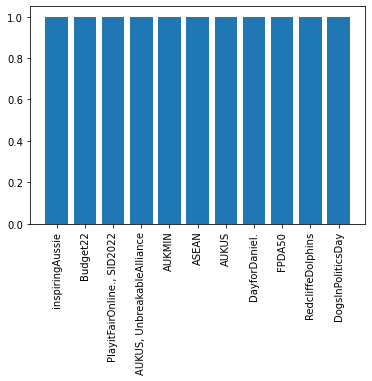

In [88]:
plt.bar(peter_tags.keys(), peter_tags.values())
plt.xticks(rotation=90)

In [241]:
peter_tags

Counter({'inspiringAussie': 1,
         'Budget22': 1,
         'PlayitFairOnline., SID2022': 1,
         'AUKUS, UnbreakableAlliance': 1,
         'AUKMIN': 1,
         'ASEAN': 1,
         'AUKUS': 1,
         'DayforDaniel.': 1,
         'FPDA50': 1,
         'RedcliffeDolphins': 1,
         'DogsInPoliticsDay': 1})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

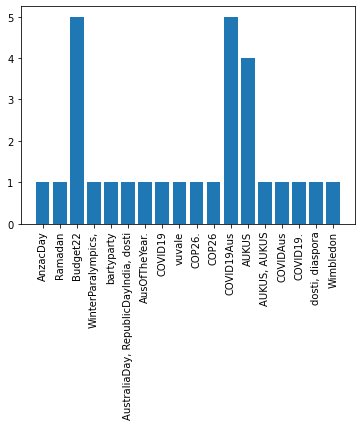

In [89]:
plt.bar(scott_tags.keys(), scott_tags.values())
plt.xticks(rotation=90)


Task 5

In [211]:
import pandas as pd
import re
import emoji
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('words')
words = set(nltk.corpus.words.words())

def cleaner(tweet):
    tweet = re.sub("(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet

def getTokens(tweet):
     return word_tokenize(tweet)


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Danis\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [212]:
scott_clean = data[data['name'] == 'Scott Morrison']
scott_clean['text_clean'] = scott_clean.apply(lambda x: cleaner(x['text']), axis=1)

<ipython-input-212-7d28e16df904>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scott_clean['text_clean'] = scott_clean.apply(lambda x: cleaner(x['text']), axis=1)


In [184]:
def getWords(x):
    words_clean = []
    for w in x.split(' '):
        if w not in words:
            words_clean.append(w)
    return ', '.join(words_clean)

In [227]:
from nltk.probability import FreqDist
all_words_scott = []
for index, row in scott_clean.iterrows():
    for w in row['text_clean'].split(' '):
        if w not in words:
            all_words_scott.append(w)
fdist_scott = FreqDist(all_words_scott).most_common(20)
all_fdist = pd.Series(dict(fdist_scott))


<AxesSubplot:>

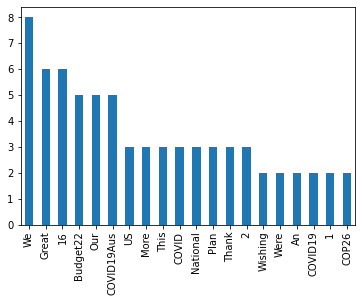

In [245]:
all_fdist.plot(kind='bar')

<ipython-input-246-77f54f197c6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pete_clean['text_clean'] = pete_clean.apply(lambda x: cleaner(x['text']), axis=1)


<AxesSubplot:>

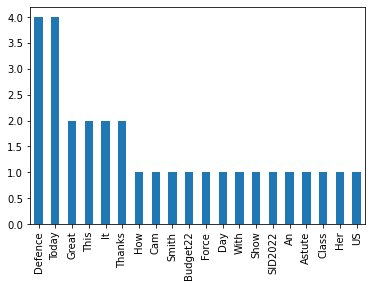

In [246]:
from nltk.probability import FreqDist
pete_clean = data[data['name'] == 'Peter Dutton']
pete_clean['text_clean'] = pete_clean.apply(lambda x: cleaner(x['text']), axis=1)

all_words_pete = []
for index, row in pete_clean.iterrows():
    for w in row['text_clean'].split(' '):
        if w not in words:
            all_words_pete.append(w)
fdist = FreqDist(all_words_pete).most_common(20)
fdist = pd.Series(dict(fdist))
fdist.plot(kind='bar')

Task 6

In [124]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

user1Sentences = []
user2Sentences = []

for tweet in tweets:
    user1Sentences.append(tweet.full_text)
for tweet in tweets2:
    user2Sentences.append(tweet.full_text)


In [145]:
analyzer = SentimentIntensityAnalyzer()
user1Sentiments = []
user2Sentiments = []

for sentence in user1Sentences:
    vs = analyzer.polarity_scores(sentence)
    user1Sentiments.append([sentence, vs['neg'], vs['neu'], vs['pos'], vs['compound']])

for sentence in user2Sentences:
    vs = analyzer.polarity_scores(sentence)
    user2Sentiments.append([sentence, vs['neg'], vs['neu'], vs['pos'], vs['compound']])



In [146]:
user1Sentiments = pd.DataFrame(user1Sentiments)
user1Sentiments = pd.DataFrame({'text':user1Sentiments[0], 'neg': user1Sentiments[1], 'neu': user1Sentiments[2], 'pos':user1Sentiments[3], 'compound':user1Sentiments[4]})
user2Sentiments = pd.DataFrame(user2Sentiments)
user2Sentiments = pd.DataFrame({'text':user2Sentiments[0], 'neg': user2Sentiments[1], 'neu': user2Sentiments[2], 'pos':user2Sentiments[3], 'compound':user2Sentiments[4]})

In [152]:
user1Sentiments

,text,neg,neu,pos,compound
0,"Happy Election Day, Australia! Here's how to v...",0.000,0.765,0.235,0.6114
1,Just awful to hear the news of the passing of ...,0.085,0.684,0.231,0.8748
2,Deeply saddened to hear of the passing of UAE ...,0.078,0.892,0.030,-0.5095
3,I congratulate Ferdinand Marcos Jr @bongbongma...,0.000,0.858,0.142,0.7269
4,"Great news! Alongside the Olympics, the FIFA W...",0.000,0.764,0.236,0.9113
...,...,...,...,...,...
179,"Brilliant stuff @ashbarty! An outstanding win,...",0.000,0.351,0.649,0.9697
180,Huge congrats to Cate Campbell and Patty Mills...,0.000,0.748,0.252,0.8439
181,A record week for COVID-19 vaccinations last w...,0.000,1.000,0.000,0.0000
182,Australia is charting a pathway out of COVID-1...,0.000,0.952,0.048,0.2732


In [153]:
user2Sentiments

,text,neg,neu,pos,compound
0,Our thoughts and prayers are with the families...,0.209,0.585,0.207,-0.0305
1,Shubh Dussehra! Warmest wishes to our Australi...,0.000,0.753,0.247,0.5562
2,Why does @AustralianLabor always look for a wa...,0.050,0.851,0.099,0.3400
3,On the 21st anniversary of the September 11 at...,0.235,0.596,0.169,-0.6124
4,An extraordinary life which touched so many ha...,0.149,0.792,0.059,-0.6352
...,...,...,...,...,...
130,Welcome to the crew of @FregatteBayern who arr...,0.000,0.840,0.160,0.7906
131,Ralph hasn’t made an appearance since we were ...,0.000,1.000,0.000,0.0000
132,Tks @GDElectricBoat the home of the Virginia c...,0.000,0.886,0.114,0.6486
133,We also honoured the ten Australian lives lost...,0.114,0.645,0.241,0.3749


In [150]:
user1Sentiments['compound'].mean()

0.5350565217391303

In [151]:
user2Sentiments['compound'].mean()

0.3913525925925924

Creating JSON Files

In [172]:
import json
with open('user1tweets.json', 'a', encoding='utf8') as file:
    for t in tweets:
        json.dump(t._json, file)

with open('user2tweets.json', 'a', encoding='utf8') as file:
    for t in tweets2:
        json.dump(t._json, file)


Creating CSVs


In [174]:
user1Tweets = []
user2Tweets = []
for tweet in tweets:
    user1Tweets.append([tweet.user.name, tweet.full_text, pd.to_datetime(tweet.created_at)])
for tweet in tweets2:
    user2Tweets.append([tweet.user.name, tweet.full_text, pd.to_datetime(tweet.created_at)])
user1Tweets = pd.DataFrame(user1Tweets)
user2Tweets = pd.DataFrame(user2Tweets)

user1Tweets = pd.DataFrame({'name':user1Tweets[0], 'text': user1Tweets[1], 'created_at': user1Tweets[2]})
user2Tweets = pd.DataFrame({'name':user2Tweets[0], 'text': user2Tweets[1], 'created_at': user2Tweets[2]})

user1Tweets.to_csv('user1.csv')
user2Tweets.to_csv('user2.csv')